In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
#reading dataset
df = pd.read_csv("/content/DiamondsNew.csv")
df.head()

,Unnamed: 0,cut,clarity,color,price,depth,carat,table,x,y,z
0,1,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,2,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,3,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,4,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,5,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [7]:
#deleting unamed column and columns with string values
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [9]:
#getting list of all unique values from respective columns from the dataframe
print(df['cut'].unique())
print(df['clarity'].unique())
print(df['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [10]:
#creating a dictionary and then replacing the string values with integers
cut = {'Ideal': 4, 'Premium': 3, 'Good': 1, 'Very Good': 2, 'Fair': 0}
df.cut = [cut[item] for item in df.cut]
df.head()


,cut,clarity,color,price,depth,carat,table,x,y,z
0,4,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,3,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,1,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,3,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,1,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [11]:
clarity = {'SI2': 1, 'SI1': 2, 'VS1': 3, 'VS2':4, 'VVS2': 5, 'VVS1': 6, 'I1': 7, 'IF':8}
df.clarity = [clarity[item] for item in df.clarity]
df.head()


,cut,clarity,color,price,depth,carat,table,x,y,z
0,4,1,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,3,2,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,1,3,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,3,4,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,1,1,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [12]:
color = {'E': 5, 'I': 1, 'J': 0, 'H':2, 'F': 4, 'G': 3, 'D': 6}
df.color = [color[item] for item in df.color]
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,4,1,5,326,61.5,0.23,55.0,3.95,3.98,2.43
1,3,2,5,326,59.8,0.21,61.0,3.89,3.84,2.31
2,1,3,5,327,56.9,0.23,65.0,4.05,4.07,2.31
3,3,4,1,334,62.4,0.29,58.0,4.20,4.23,2.63
4,1,1,0,335,63.3,0.31,58.0,4.34,4.35,2.75


In [13]:


# Method2-using label encoder for the categorical data
"""
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
"""



"\nfrom sklearn import preprocessing \nlabel_encoder = preprocessing.LabelEncoder() \n\ndf['cut'] = label_encoder.fit_transform(df['cut'])\ndf['color'] = label_encoder.fit_transform(df['color'])\ndf['clarity'] = label_encoder.fit_transform(df['clarity'])\n"

In [14]:
#checking for NaN values
print(format(df.isnull().sum()))

cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64


In [15]:
#number of empty cells in each columns
print(format((df.x==0).sum()))
print(format((df.y==0).sum()))
print(format((df.z==0).sum()))
print(format((df.carat==0).sum()))
print(format((df.table==0).sum()))
print(format((df.depth==0).sum()))

8
7
20
0
0
0


In [16]:
df =df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

In [17]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,4,1,5,326,61.5,0.23,55.0,3.95,3.98,2.43
1,3,2,5,326,59.8,0.21,61.0,3.89,3.84,2.31
2,1,3,5,327,56.9,0.23,65.0,4.05,4.07,2.31
3,3,4,1,334,62.4,0.29,58.0,4.20,4.23,2.63
4,1,1,0,335,63.3,0.31,58.0,4.34,4.35,2.75


In [18]:
#replacing 3 columns with dimensional data with a column containing the volume
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)
df.head()

,cut,clarity,color,price,depth,carat,table,volume
0,4,1,5,326,61.5,0.23,55.0,38.202030
1,3,2,5,326,59.8,0.21,61.0,34.505856
2,1,3,5,327,56.9,0.23,65.0,38.076885
3,3,4,1,334,62.4,0.29,58.0,46.724580
4,1,1,0,335,63.3,0.31,58.0,51.917250


In [19]:
fig = px.scatter_matrix(df)
fig.update_layout(
    autosize = False,
    width=1000, height = 1000
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
#multicollinearity by scatterplot

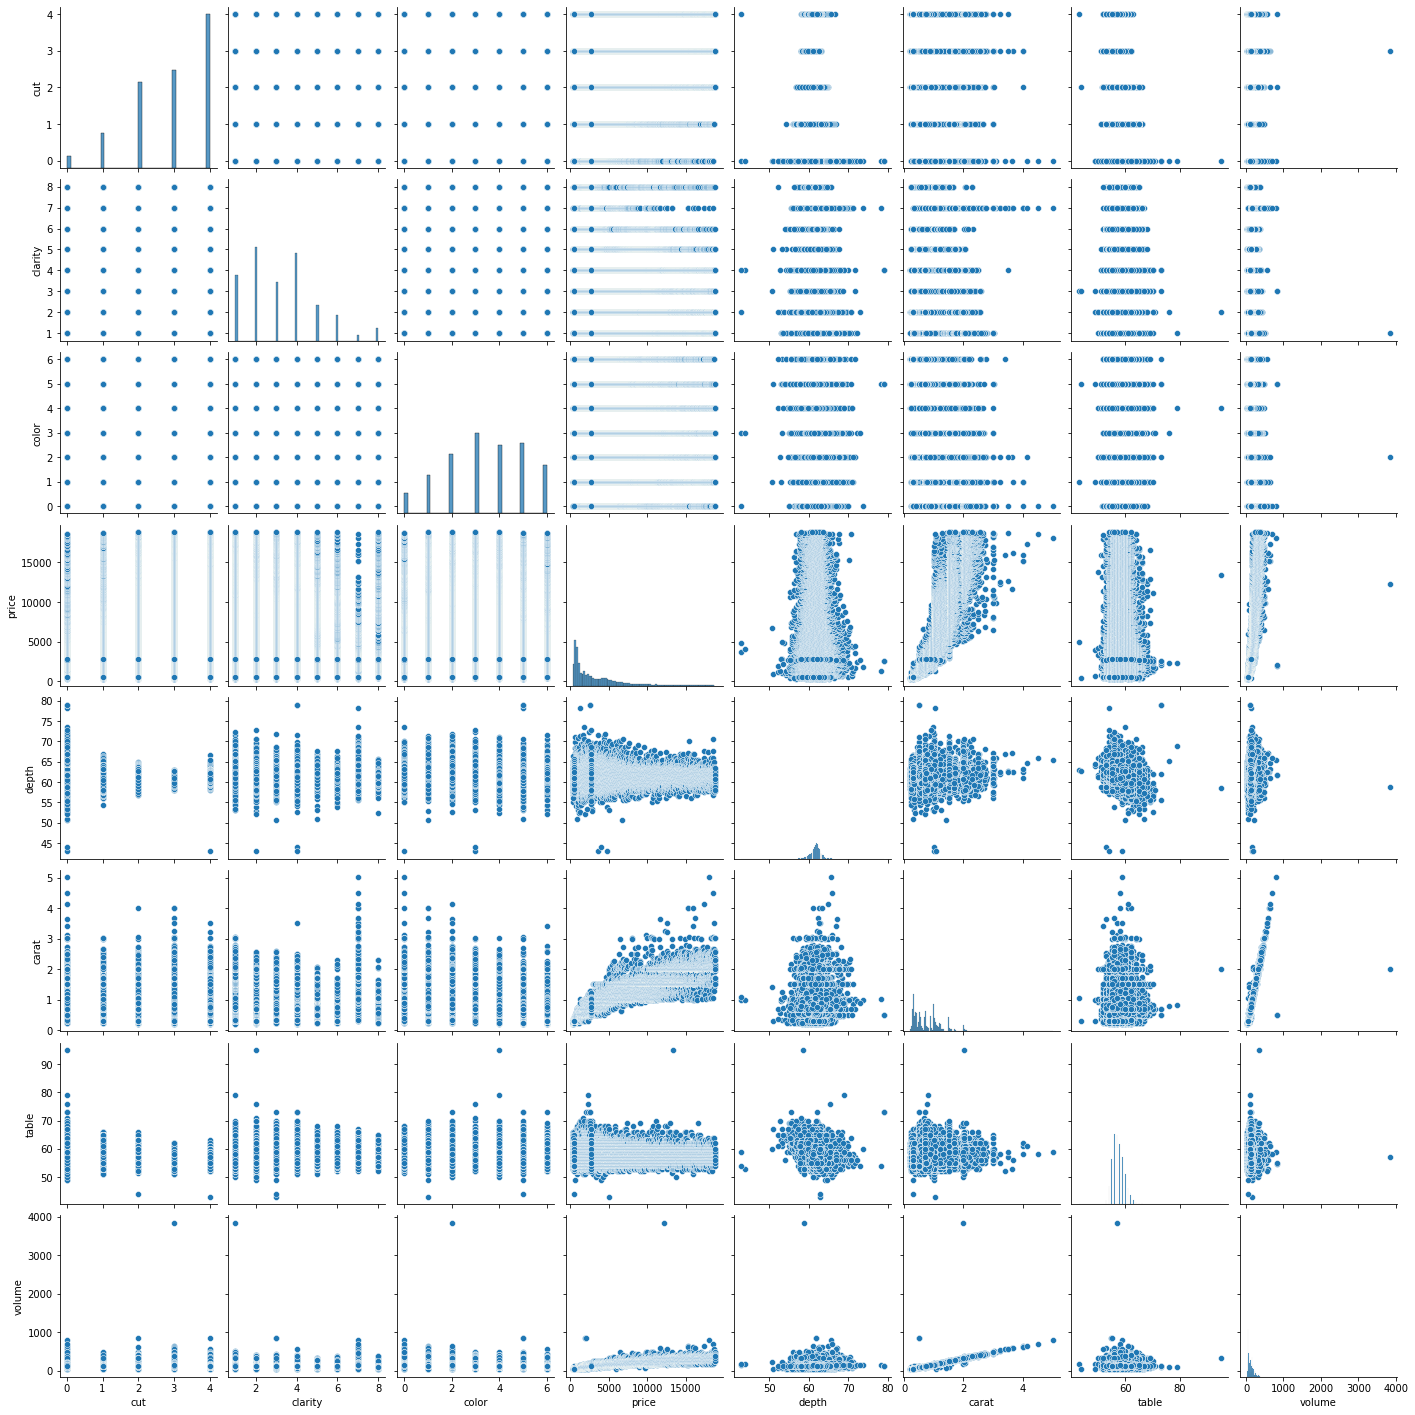

In [21]:
sns.pairplot(df)

In [22]:
#dataframe of only independent variables
df1= df.drop(['price'], axis=1) 

#Detecting Multiocollinearity using builtin function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

"""
variance_inflation_factor expects the presence of a constant in the matrix of
explanatory variables.
One can use add_constant from statsmodels to add the required constant to the 
dataframe before passing its values to the function.
"""

df1 = add_constant(df1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]

print(vif_data)

   feature          VIF
0    const  5220.054528
1      cut     1.476977
2  clarity     1.115663
3    color     1.109481
4    depth     1.329057
5    carat    23.995976
6    table     1.580467
7   volume    23.616334


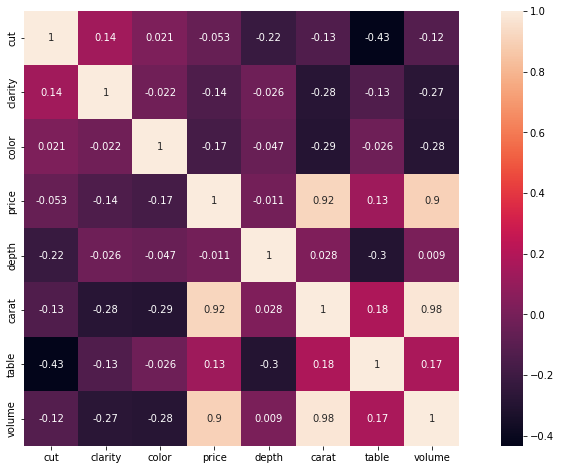

In [23]:
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

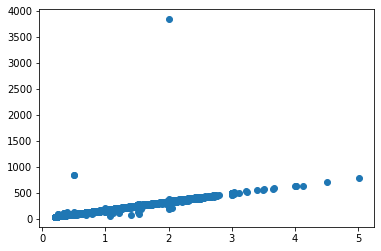

In [24]:
#We can see that there is a strong correlation between carat and volume. Hence we drop volume column from our independent variable list

plt.scatter(df1['carat'], df1['volume'])

In [25]:
df= df.drop(['volume'], axis=1)

61.0 62.5
64.75 58.75


,cut,clarity,color,price,depth,carat,table
2,1,3,5,327,56.9,0.23,65.0
24,2,2,0,353,58.1,0.31,62.0
35,1,3,4,402,58.2,0.23,59.0
43,1,3,6,403,58.4,0.26,63.0
84,1,6,5,554,57.9,0.26,60.0
...,...,...,...,...,...,...,...
53757,0,4,4,2724,55.4,0.72,64.0
53886,1,4,6,2749,58.0,0.70,62.0
53890,1,2,5,2749,57.9,0.73,55.0
53895,1,3,4,2751,57.8,0.70,61.0


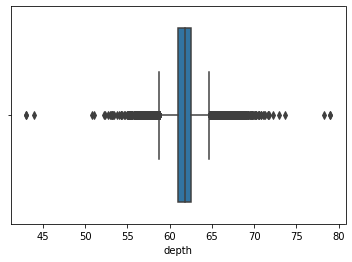

In [26]:
#Boxplot to visualize outliers in depth column
sns.boxplot(df['depth'])

#find the inter quartile range (IQR) for dept column
percentile25Depth = df['depth'].quantile(0.25)
percentile75Depth = df['depth'].quantile(0.75)
iqr= percentile75Depth-percentile25Depth
print(percentile25Depth,percentile75Depth)


#Find upper and lower limit for depth column
upper_limit = percentile75Depth + 1.5 * iqr
lower_limit = percentile25Depth - 1.5 * iqr
print(upper_limit, lower_limit)

#find outliers in depth column
df[df['depth'] > upper_limit]
df[df['depth'] < lower_limit]

In [27]:
#Remove outliers in depth column and obtain a new dataframe
new_df= df[df['depth'] < upper_limit]
new_df= df[df['depth']>lower_limit]

In [28]:
df.shape

(53920, 7)

In [29]:
new_df.shape

(52416, 7)

In [30]:
new_df.head()

,cut,clarity,color,price,depth,carat,table
0,4,1,5,326,61.5,0.23,55.0
1,3,2,5,326,59.8,0.21,61.0
3,3,4,1,334,62.4,0.29,58.0
4,1,1,0,335,63.3,0.31,58.0
5,2,5,0,336,62.8,0.24,57.0


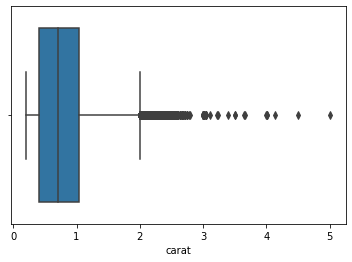

In [31]:
#Boxplot to visualize outliers in carat column
sns.boxplot(df['carat'])

In [32]:
#Remove outliers in carat column
#we can see that the outliers are above the value of 2 carat
#remove all the outliers in carat column above 2
new_df= new_df[new_df['carat'] < 2]

In [33]:
new_df.shape #Noting reduction in size of the data frame after removing the outliers in carat column

(50373, 7)

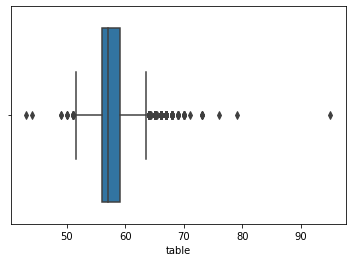

In [34]:
#Boxplot to visualize outliers in table column
sns.boxplot(df['table'])

In [35]:
#Remove outliers in table column
#we can see that the outliers are above the value of 63 and below the value of 52
#retain only the values in the range 52 to 63
new_df= new_df[new_df['table'] < 63]
new_df= new_df[new_df['table'] > 52]

In [36]:
new_df.shape

(49502, 7)

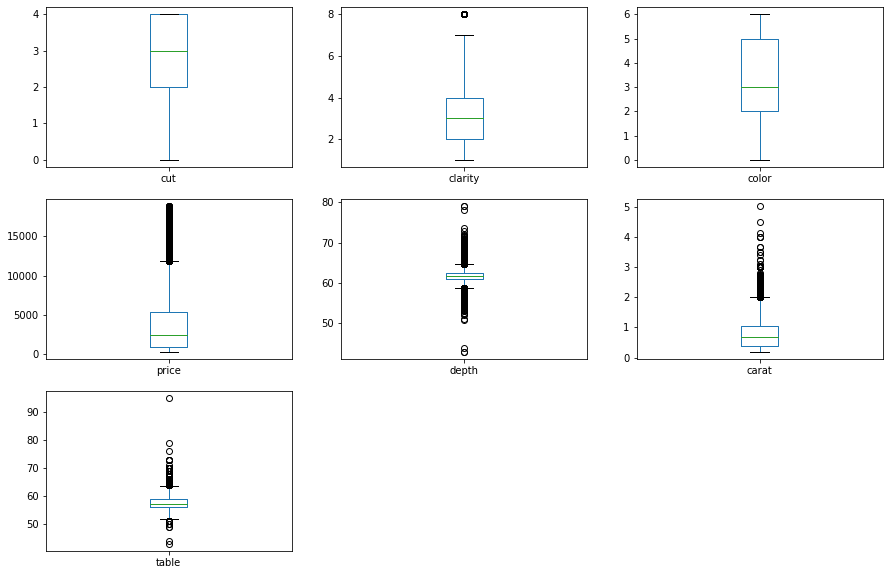

In [37]:
#Code to obtain box plot for all the columns in the data frame
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [38]:
new_df.head()

,cut,clarity,color,price,depth,carat,table
0,4,1,5,326,61.5,0.23,55.0
1,3,2,5,326,59.8,0.21,61.0
3,3,4,1,334,62.4,0.29,58.0
4,1,1,0,335,63.3,0.31,58.0
5,2,5,0,336,62.8,0.24,57.0


In [39]:
df1=new_df.drop(['price'], axis=1)
df1.columns #checking what columns are there in df1



#Define the independent and dependent variables
y= new_df['price'] #dependent variable is price
x= df1

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data



#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)

PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict

,Actual price,Predicted price
53935,2757,3809.921753
43200,1395,1424.529356
34826,878,511.422770
10644,4836,4937.722753
10840,4872,4766.090607
...,...,...
53190,2633,2865.172500
29974,715,492.762101
30320,726,-162.281532
31933,776,314.807672


In [40]:
#Model Evaluation
MSE= (np.sum((y_test-y_prediction)**2))/len(y_test)

print(MSE)

1471388.939240973


In [41]:
np.sqrt(MSE) #Obtain root means square error

1213.0082189502975

In [42]:
#Obtain the intercept and the coefficient
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

 Equation of the regression line is y_est= 3130.3442271759554 + [ 105.05377061  345.11889899  287.98400672  -94.28244702 8459.08189803
  -44.15694005]*x


In [43]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.8683900792592685


Using statsmodels

In [49]:
#Obtain root mean square error
sm.tools.eval_measures.rmse(y_test, y_prediction, axis=0) 

1213.0082189502975

In [50]:
x = sm.add_constant(x) #This is the intercept that has to be added to create the model

In [51]:
modelNew = sm.OLS(y, x) # create the model
fitted = modelNew.fit() #fit the model

In [52]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 5.443e+04
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:53:05   Log-Likelihood:            -4.2178e+05
No. Observations:               49502   AIC:                         8.436e+05
Df Residuals:                   49495   BIC:                         8.436e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3146.1361    451.253      6.972      0.000    2261.676    4030.596
cut          102.0755      6.387     15.981      0.000      89.556     114.595
clarity      345.1904      3.266    105.684      0.000     338.789     351.592
color        286.8159      3.374     85.014      0.000     280.203     293.428
depth        -94.6040      5.261    -17.982      0.000    -104.915     -84.293
carat       8460.9004     15.038    562.641      0.000    8431.426    8490.375
table        -43.9031      3.336    -13.160      0.000     -50.442     -37.364
==============================================================================
Omnibus:                    12953.068   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134476.010
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                      10.842   Cond. No.                     6.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion:**

Successfully performed multiple linear regression using sklearn, statsmodels and excel and interpreted the results.